The `pandas` library provides high - performance, easy to use data structures and data analysis tools. 
- The main data structure is the `DataFrame`, which you can think of an in-memory 2D table (like a spreadsheet, with colum names and row labels). 
- Many features available in Excel are available programatically, such as:
    - Creating pivot tables
    - computing columns based on other columns,
    - plotting graphs
    - You can group rows and column value, or
    - join tables like in SQL
    - Also great at handling time series
    

In [1]:
import pandas as pd

### `Series` objects:
- `Series` objects that we wil discuss now. A `Series` object is `1D` array, similar to a column in a spreadsheer ( with a column name and row labels ). 
- `Dataframe` objects. This is a 2D table, similar to a spreadsheer ( with column names and row labels). 
- `Panel` objects. You can see a `Panel` as a dictionary of `Dataframes`. These are less used, so not discussed. 

### Creating a `Series`: 

In [2]:
s = pd.Series([2, -1, 3, 5])
s

0    2
1   -1
2    3
3    5
dtype: int64

### Similar to a 1D `ndarray`: 
- `Series` objects behave much like one-dimensional NumPy `ndarrays`, and you can often pass them as parameters to NumPy functions. 


In [3]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

- Arithmetic opperations are also possible, and they apply `elementwise` just like for `ndarrays`
- DOUBT: Relationship between numpy and pandas. What numpy objects can be passed to pandas functions and what pandas objects can be passed to NumPy function? 


In [4]:
s + [1000, 2000, 3000, 4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

- 

- Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. 
- This is called _broadcasting__

In [5]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

- The same is true for all binary operations such as * or / , and veven conditional operators. 

In [6]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

### Indexing by Label/Postion: 
- Each item in the `Series` object has a unique identifier, called the _index_ label.
- By default, it is simply the rank of the item in the `Series`(starting at 0), but you can also __set the index label manually using the `index`__ argument in the `pd.Series` function.


In [7]:
s2 = pd.Series([68, 83, 112, 68],
              index = ["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

- You can then use a `Series` object __just like a `dict`__. 

In [8]:
s2["bob"]

83

- You can still access the items by integer location, like in a _regular_ `array`. 


In [9]:
s2[1]

83

- So that causes a lil confusion, doesn't it? 
    - You can access by both index_name / label, and by integer location. 
- To make it clear when you are accessing by label or by integer location, it is recommended to always use: 
    - __Label Indexing__
        - the `loc` attribute of the `Series objects`, to access by label. (`l` for `loc`, `l` for `label`) 
    - __Positional Indexing__
        - and use `iloc` attribute of the `Series objects` to access by integer location. (`i` for `iloc`, `i` for `integer location`) 

- __Note__ that in pandas, there is a difference between `postion` and `index`:
    - __`position`__ is the __`integer location`__ of the object. 
    - __`index`__ is the __`label location`__ of the object. 

In [10]:
s2.loc["bob"]

83

In [11]:
s2.iloc[1]

83

- If you try to access `integer location` using `loc`: 
     - It'll give an error saying that it cannot do `label indexing` with an `integer`. 

In [12]:
"""s2.loc[2]"""
# TypeError: cannot do label indexing on <class 
# 'pandas.core.indexes.base.Index'> with these
# indexers [2] of <class 'int'>


's2.loc[2]'

- If you try to access `label location` using `iloc`: 
     - It'll give an error saying that it cannot do `postional indexing` with a `string`. 

In [13]:
"""s2.iloc["bob"]"""
# TypeError: cannot do positional indexing on
# <class 'pandas.core.indexes.base.Index'> with t
# hese indexers [bob] of <class 'str'>

's2.iloc["bob"]'

- Slicing a `Series` also slices the index labels: 

In [14]:
s2.iloc[1:3]
# >> See, 'bob

bob         83
charles    112
dtype: int64

- This can lead to unexpected results when using the default numeric labels, so be careful: 


In [15]:
surpise = pd.Series([1000, 1001, 1002, 1003])
surpise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [16]:
surpise_slice = surpise.loc[0] # Accesing by index name
surpise_slice # 1000, same result as when indexed by postion

1000

In [17]:
surpise_slice2 = surpise.iloc[0] # Accesing by postion
surpise_slice2 # 1000, same result as when indexed by label

1000

## Initialize from `dict`: 
- You can create a `Series` object from a `dict`. 
- The keys will be used as index labels, and the values as well, values of the index labels. 

In [18]:
weights = {
    'alice' : 68,
    'bob':83,
    'colin':86,
    'darwin': 68,
}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

- You can control:
    - __which elements__ you want to include in the `Series` and 
    - __in what order__ explicitly specifying the desired `index`. 

In [19]:
s4 = pd.Series(weights, index =['darwin', 'bob'])
s4

darwin    68
bob       83
dtype: int64

### Automatic Alignment: 

- When an operation involves multiple `Series` objects, `pandas` automatically aligns  objects by matching index labels. 
    - use the __`.keys()`__ function to retrive the name of the index labels. 
    - Add the two `Series` objects.
    - See how they get aligned.


In [20]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

- the resulting `Series` contains the union of index labels from `s2` `s3`.  
- Since `"colin"` is missing from `s2` and `"charles"` is missing from s3, these items have a `NaN` result value. (i.e Not - a - Number means `missing`. 
- In other words, if a label index is not in both the `Series objects`, they have a `NaN` value when you add them. 
- Automatic alignment is very handy when working with data thay may come from various sources with varying structure and missing items. 
- __Note:__ If you forget to set the right index labels, you can have surprising results.
    - using the __.values__ attribute, you can access the values of a `series object` bounded by an array. The dimension of the returned array depends on the dimension of the `series object`. 
        - If it is a series, you get a 1 dimensional array of values. 
        - If it is a dataframe, you get a 2 dimensional array of values. 

In [21]:
s5 = pd.Series([1000, 1000, 1000, 1000])
print("s2 =", s2.values)
print("s5 = ", s5.values)

s2 + s5

s2 = [ 68  83 112  68]
s5 =  [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

Pandas could not align the `Series`, since their labels do not match at all, hence the full `NaN` result. 

### Intialize with a scalar: 
- You can also intialize a `Series object` using a scalar and a list of index labels: 
    - All items / index labels will be set to the same scalar. 

In [22]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

### `Series` name: 
- A Series can have a name. 

In [23]:
s6 = pd.Series([83, 68], index = ["bob", "alice"],
              name = "weights"
              )
s6

# Output without name: 
# bob      83
# alice    68
# dtype: int64

# Output with name: 
# bob      83
# alice    68
#>> Name: weights, dtype: int64

bob      83
alice    68
Name: weights, dtype: int64

### Plotting a `Series`: 

Pandas makes it easy to plot `Series` data using matplotlib. 
- Just import matplotlib and call the `plot()` method on the the `Series object`. 


[(0, 5.0), (1, 6.0), (2, 7.0), (3, 7.0), (4, 7.0), (5, 7.0), (6, 6.0), (7, 6.0), (8, 5.0), (9, 5.0), (10, 4.0), (11, 4.0)]


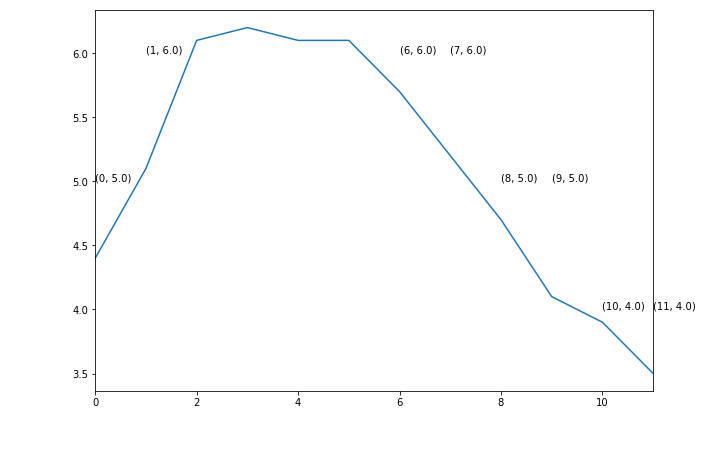

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,
                4.7,4.1,3.9,3.5]

s7 = pd.Series(temperatures, name = "Temperatures")

# >> Printing the list of (x,y) coordinate points. 
x_y_coordinates = zip(s7.index, np.ceil(s7.values))
# >> np.ceil is used cause Pandas prints the values as 
# long decimals 
list_coords = list(x_y_coordinates)
print(list_coords)
# list() is used cause zip object is not printed 
# shown when printed. 
s7.plot(figsize = (10,7))

for point in list_coords:
    plt.annotate(str(point), 
             xy= point)


- There are may options for plotting your data. 
- It is not necessary to list them all here. 
- If you do need a particular typle of plot ( histograms, pie charts, etc.) just look for it in the Visualization section of pandas' documentation, and look at the example code. 

### Handling time: 
Many datasets have timestamps, and pandas is awesome at manipulations of such data: 
- It can represent periods ( such as 2016Q3) and frequencies (such as "monthly") 
- It can convert periods to actual timestamps. 
- It can convert timesstamps to periods. 
- It can resmaple data and aggregate values any way you like. 
- It can handle timezones. 


### Time range: 
- Let's start by creating a time series using `timerange`. 
- This returns a `DataTimeIndex` containing one datatime per hour for hour for 12 hours starting on October 29th 216 at 5:30p.m

In [25]:
dates = pd.date_range("2016/10/29 5:30pm", # start datatime
                     periods = 12, # number of periods 
                     freq = 'H' # 'H' means every hour, 
                      # 'M' means every month
                     )
dates

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

- This returns a `DataTimeIndex` containing one datatime per hour for hour for 12 hours starting on October 29th 216 at 5:30p.m. 
- This `datetimeindex` may be used as an index in a `Series:` 


In [26]:
s7

0     4.4
1     5.1
2     6.1
3     6.2
4     6.1
5     6.1
6     5.7
7     5.2
8     4.7
9     4.1
10    3.9
11    3.5
Name: Temperatures, dtype: float64

In [27]:
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

- You can also convert a `series object` to a dictionary, using the `dict` argument. 

In [28]:
for index, value in dict(temp_series).items():
    print("The temperature was " , value, \
          " degrees celcius at " ,index)

The temperature was  4.4  degrees celcius at  2016-10-29 17:30:00
The temperature was  5.1  degrees celcius at  2016-10-29 18:30:00
The temperature was  6.1  degrees celcius at  2016-10-29 19:30:00
The temperature was  6.2  degrees celcius at  2016-10-29 20:30:00
The temperature was  6.1  degrees celcius at  2016-10-29 21:30:00
The temperature was  6.1  degrees celcius at  2016-10-29 22:30:00
The temperature was  5.7  degrees celcius at  2016-10-29 23:30:00
The temperature was  5.2  degrees celcius at  2016-10-30 00:30:00
The temperature was  4.7  degrees celcius at  2016-10-30 01:30:00
The temperature was  4.1  degrees celcius at  2016-10-30 02:30:00
The temperature was  3.9  degrees celcius at  2016-10-30 03:30:00
The temperature was  3.5  degrees celcius at  2016-10-30 04:30:00


Let's plot this series using a bar graph. 
- We will not use a histogram because this is depicting kind of a categorical data, whnere the categories are the different datatime stamps. 

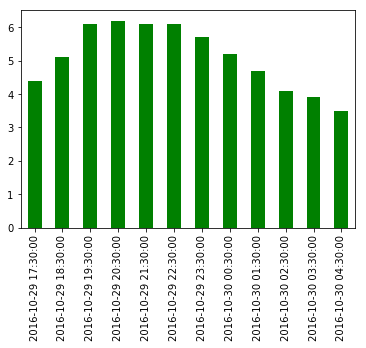

In [29]:
temp_series.plot(kind = "bar", color = "green")

### [Resampling](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html): 
- Pandas lets us resample a time series very simple. 
- Just call the `resample` method and specify a new frequency: 
- To my knowlege, this is only applicable to a `time series`. 

In [30]:
# temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H = temp_series.resample("2H").mean()
print(temp_series_freq_2H)

2016-10-29 16:00:00    4.40
2016-10-29 18:00:00    5.60
2016-10-29 20:00:00    6.15
2016-10-29 22:00:00    5.90
2016-10-30 00:00:00    4.95
2016-10-30 02:00:00    4.00
2016-10-30 04:00:00    3.50
Freq: 2H, dtype: float64


```python
FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
```

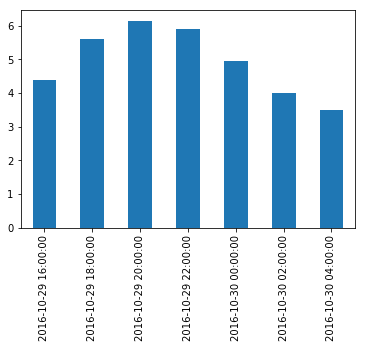

In [31]:
temp_series_freq_2H.plot(kind = "bar")


```python

FutureWarning: 
.resample() is now a deferred operation. You called plot(...) on this deferred object which materialized it into a series by implicitly taking the mean.  Use .resample(...).mean() instead
"""Entry point for launching an IPython kernel.

```
- This means that .resample() is a deferred operation. 
- You need to explicitly tell .resample() __how__ to take to do the resampling, otherwise it will implictly take the mean when label values overlap.  
```python
FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
```
- __how__ is also deprecated now. So just use a numpy mathematical function (`.mean()`, `.min()`, `.max()`)after entering in the new `rule` in the `resample` function 

In [32]:
for index, value in dict(temp_series_freq_2H).items():
    print("The temperature was " , value, \
          " degrees celcius at " ,index)

The temperature was  4.4  degrees celcius at  2016-10-29 16:00:00
The temperature was  5.6  degrees celcius at  2016-10-29 18:00:00
The temperature was  6.15  degrees celcius at  2016-10-29 20:00:00
The temperature was  5.9  degrees celcius at  2016-10-29 22:00:00
The temperature was  4.95  degrees celcius at  2016-10-30 00:00:00
The temperature was  4.0  degrees celcius at  2016-10-30 02:00:00
The temperature was  3.5  degrees celcius at  2016-10-30 04:00:00


Note how the values have been aggregated into 2-hour periods. 
If we look at 6-8pm period, for example, we had a value of `5.1` at 6:30pm and `6.1` at 7:30pm. 
After resampling, we just had one value of `5.6`, which is the mean of `5.1` and` 6.1`. 
- Computing the mean is the default behaviour, but it is also possible to use a different aggregation function. 
- for example, we can decide to keep the minimum value of each period. 

In [33]:
temp_series_freq_2H = temp_series.resample("2H").min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [34]:
for index, value in dict(temp_series_freq_2H).items():
    print("The temperature was " , value, \
          " degrees celcius at " ,index)

The temperature was  4.4  degrees celcius at  2016-10-29 16:00:00
The temperature was  5.1  degrees celcius at  2016-10-29 18:00:00
The temperature was  6.1  degrees celcius at  2016-10-29 20:00:00
The temperature was  5.7  degrees celcius at  2016-10-29 22:00:00
The temperature was  4.7  degrees celcius at  2016-10-30 00:00:00
The temperature was  3.9  degrees celcius at  2016-10-30 02:00:00
The temperature was  3.5  degrees celcius at  2016-10-30 04:00:00


### Upsampling and [interpolation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.interpolate.html):  
- This was an example of downsampling. 
- We can also upsample (i.e increase the frequency), but this creates holes in the data. 
- What is [interpolation](http://study.com/academy/lesson/interpolation-in-statistics-definition-formula-example.html)? 

In [35]:
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

In [36]:
temp_series_freq_15min = temp_series.resample("15min").mean()
temp_series_freq_15min

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
2016-10-29 20:00:00    NaN
2016-10-29 20:15:00    NaN
2016-10-29 20:30:00    6.2
2016-10-29 20:45:00    NaN
2016-10-29 21:00:00    NaN
2016-10-29 21:15:00    NaN
2016-10-29 21:30:00    6.1
2016-10-29 21:45:00    NaN
2016-10-29 22:00:00    NaN
2016-10-29 22:15:00    NaN
2016-10-29 22:30:00    6.1
2016-10-29 22:45:00    NaN
2016-10-29 23:00:00    NaN
2016-10-29 23:15:00    NaN
2016-10-29 23:30:00    5.7
2016-10-29 23:45:00    NaN
2016-10-30 00:00:00    NaN
2016-10-30 00:15:00    NaN
2016-10-30 00:30:00    5.2
2016-10-30 00:45:00    NaN
2016-10-30 01:00:00    NaN
2016-10-30 01:15:00    NaN
2016-10-30 01:30:00    4.7
2016-10-30 01:45:00    NaN
2016-10-30 02:00:00    NaN
2016-10-30 02:15:00    NaN
2016-10-30 02:30:00    4.1
2

- One solution is is by interpolating (insert (something of a different nature) into something else.) . 
- The default is to use linear interpolation, but we can also select another method, such as cubic interpolation: 

In [37]:
temp_series_freq_15min_cubic_inter = temp_series_freq_15min.interpolate(
#     method = "cubic"
)

In [38]:
temp_series_freq_15min_cubic_inter

2016-10-29 17:30:00    4.400
2016-10-29 17:45:00    4.575
2016-10-29 18:00:00    4.750
2016-10-29 18:15:00    4.925
2016-10-29 18:30:00    5.100
2016-10-29 18:45:00    5.350
2016-10-29 19:00:00    5.600
2016-10-29 19:15:00    5.850
2016-10-29 19:30:00    6.100
2016-10-29 19:45:00    6.125
2016-10-29 20:00:00    6.150
2016-10-29 20:15:00    6.175
2016-10-29 20:30:00    6.200
2016-10-29 20:45:00    6.175
2016-10-29 21:00:00    6.150
2016-10-29 21:15:00    6.125
2016-10-29 21:30:00    6.100
2016-10-29 21:45:00    6.100
2016-10-29 22:00:00    6.100
2016-10-29 22:15:00    6.100
2016-10-29 22:30:00    6.100
2016-10-29 22:45:00    6.000
2016-10-29 23:00:00    5.900
2016-10-29 23:15:00    5.800
2016-10-29 23:30:00    5.700
2016-10-29 23:45:00    5.575
2016-10-30 00:00:00    5.450
2016-10-30 00:15:00    5.325
2016-10-30 00:30:00    5.200
2016-10-30 00:45:00    5.075
2016-10-30 01:00:00    4.950
2016-10-30 01:15:00    4.825
2016-10-30 01:30:00    4.700
2016-10-30 01:45:00    4.550
2016-10-30 02:

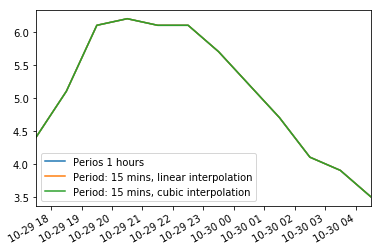

In [39]:
temp_series.plot(label = "Perios 1 hours")
temp_series_freq_15min.interpolate().plot(label = "Period: 15 mins, linear interpolation")
temp_series_freq_15min_cubic_inter.plot(label = "Period: 15 mins, cubic interpolation")
plt.legend()

### Timezones: 
- By deafualt datetimes are _naive_: They are not aware of the timezones, so 2016-10-30 2:30 might mean October 30th 2016 at 2:30am in Paris or in New York. 
- We can make datetimes _aware_ by calling the [tz_localize](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.tz_localize.html) method. 
- [list of timezones available](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones)

In [40]:
temp_series_ny = temp_series.tz_localize("America/New_York")
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
Freq: H, dtype: float64

- We can convert these datetimes to Paris like this: 

In [41]:
temp_series_pariz = temp_series_ny.tz_convert("Europe/Paris")
temp_series_pariz

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
Freq: H, dtype: float64

### Did not understand the datetime conversions, later. 

### Periods: 
- The `period_range` function returns a `PeriodIndex` instead of a `DatatimeIndex`. 
- For example, let get all quarrters in 2016 and 2017. 


In [42]:
quarters = pd.period_range("2016Q1", # Starting period
                          periods = 8, # #periods
                          freq = "Q", # frequency by quarters
                          )
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

- Adding a number `N` to a `PeriodIndex` shifts the periods by `N` times the `PeriodIndex`'s frequency. 


In [43]:
quarters + 3 # will start from 2016Q4 now, instead of 2016Q1
            # will end at 2018Q3 now, instead at 2017Q4

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]', freq='Q-DEC')

- The `asfreq` method lets us change the frequency of the `PeriodIndex`. 
- All periods are lengthened or shortened accordingly.
- For example, let's convert all the quarterly periods to monthly periods(zooming in): 
- [types of period frequencies](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


In [44]:
quarters.asfreq("M")

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]', freq='M')

- By defaukt, the `asfreq` zooms on the end of each period. 
- We can tell it to zoom on the start of each period instead. 

In [45]:
quarters.asfreq("M", how = "start")

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]', freq='M')

- And we zoom out. 

In [46]:
quarters.asfreq("A")

PeriodIndex(['2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017'], dtype='period[A-DEC]', freq='A-DEC')

- Ofcourse, we can create a `Series` with `PeriodIndex`: 

In [47]:
quaterly_revenue = pd.Series([300, 320, 290, 390, 320,
                              360, 310, 410] ,
                            index = quarters)

quaterly_revenue

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

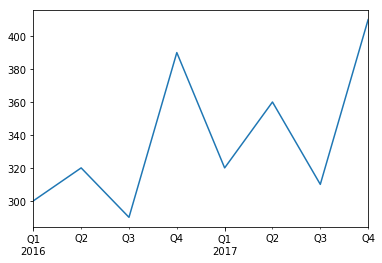

In [48]:
quaterly_revenue.plot(kind = "line")


- We can convert periods to timestamps by calling the [to_timestamp](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_timestamp.html) function.
     - By default, this will give us the first day ,( no time stamp, only data )of each period, but setting `how` and `freq`, we can  get the last hour of each period. 

In [49]:
first_days = quaterly_revenue.to_timestamp()
first_days

2016-01-01    300
2016-04-01    320
2016-07-01    290
2016-10-01    390
2017-01-01    320
2017-04-01    360
2017-07-01    310
2017-10-01    410
Freq: QS-OCT, dtype: int64

In [50]:
last_hours = quaterly_revenue.to_timestamp(how = "end",
                                          freq = "H")
last_hours

2016-03-31 23:00:00    300
2016-06-30 23:00:00    320
2016-09-30 23:00:00    290
2016-12-31 23:00:00    390
2017-03-31 23:00:00    320
2017-06-30 23:00:00    360
2017-09-30 23:00:00    310
2017-12-31 23:00:00    410
Freq: Q-DEC, dtype: int64

- And back to periods, by calling [to_period](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_period.html): 
    - Convert DataFrame from DatetimeIndex to PeriodIndex with desired frequency (inferred from index if not passed)


In [51]:
last_hours.to_period()

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

Pandas also provides many other time-related functions that we recommend you check out in the [documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html). 
To whet your apetite, here is one way to get the last business day of each month in 2016, at 9am. 


In [52]:
months_2016 = pd.period_range("2016",
                             periods = 12,
                             freq = "M")
months_2016

PeriodIndex(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'],
            dtype='period[M]', freq='M')

In [53]:
months_2016.asfreq("D",
                   how="end" # Default behaviour
                  )

PeriodIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
             '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
             '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
            dtype='period[D]', freq='D')

In [54]:
pd.Series(months_2016.to_timestamp(freq = "H", how = "end") )

0    2016-01-31 23:00:00
1    2016-02-29 23:00:00
2    2016-03-31 23:00:00
3    2016-04-30 23:00:00
4    2016-05-31 23:00:00
5    2016-06-30 23:00:00
6    2016-07-31 23:00:00
7    2016-08-31 23:00:00
8    2016-09-30 23:00:00
9    2016-10-31 23:00:00
10   2016-11-30 23:00:00
11   2016-12-31 23:00:00
dtype: datetime64[ns]

# Did not fully understand this: 

In [55]:
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[H]', freq='H')

### `DataFrame` objects: 
- A DataFrame objects represents a spreadsheet, with :
    - cell values,
    - column names
    - row-index labels
- You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. 
- You can see DataFrames as dictionaries of Series.

### Creating a `DataFrame`: 
- You can create a DataFrame y passing a dictionary of `Series` objects: 

In [56]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index = ["alice",
                                               "bob",
                                               "charles"],
                       name = "weight"),
    "birthyear": pd.Series([1984, 1985, 1992],index = ["bob",
                                                       "alice",
                                                      "charles"],
                          name = "birthyear"),
    "children": pd.Series([0,3], index = ["charles", "bob"],
                         name = "children"),
    "hobby": pd.Series(["Biking", "Dancing"], index = ["alice",
                                                      "bob"]),                       
}
people = pd.DataFrame(people_dict)
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


- A few things to note: 
    - The `Series` automatically aligned based on the index. 
    - missing values are represented as `NaN`s
    - `Series` names are ignored. 
    - `DataFrames` are displayed nicely in Jupyter notebooks. 

### Accesing Columns: 
- You can access columns pretty much as you would expect, just like a key in the dictionary. 
- They are returned as a `Series` object. 


In [57]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

- Unlike Python dictionaries, you can access multiple keys/ columns. 
- Make sure to pass in a list of column names, not just the names like: 
```python
people["birthyear", "hobby"] # wrong
people[["birthyear", "hobby"]] # right
```

In [58]:
"""people_dict[["birthyear","children"]]"""
# >> KeyError: ('birthyear', 'children')
# >> TypeError: unhashable type: 'list'

'people_dict[["birthyear","children"]]'

In [59]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


### Creating order , filtering info going in DataFrames: 
- If you pass in a list of columns and /or index row labels to the `DataFrame` constructor, it will guarantee that these columns adn/or rows will exist, in that order, and no other column/row will exist. 
- For example: 


In [60]:
d2 = pd.DataFrame(people_dict,
                 columns = ["birthyear", "weight","height"],
                 index = ["bob", "alice", "eugene"])
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


- No data for `eugene` or for `height`
- automatically align column-index combination. 


### Way 2: Creating a `DataFrame` :   using Numpy `ndarrays` with  column names and index labels: 
- Another way of creating a `DataFrame` is to pass all the values to the constructor as an `ndarray` or list of lists, and specify the column names and row index labels separately: 

- To specify missing values, you can either use `np.nan` or NumPy's masked arrays: 
- __DOUBT: did not understand masking, will need to read documentation__
    - Using __`np.nan`__

In [61]:
values = [
            [1985, np.nan , "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
]

d3 = pd.DataFrame(values,
                  columns = ["birthyear", "children",
                            "hobby", "weight"],
                  index = ["alice", "bob", "charles"]
)

d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


- Using __masked arrays__: 

In [62]:
# Starting with values, in which some are invalid, some 
# are valid. 
values = [
            [1985, "-" , "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      "-",    112]
]


In [63]:
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array

masked_array(data =
 [[1985 '-' 'Biking' 68]
 [1984 3 'Dancing' 83]
 [1992 0 '-' 112]],
             mask =
 False,
       fill_value = ?)

In [64]:
masked_array[(0, 2), (1, 2)] = np.ma.masked
# >> Probably takes in indexes as coordinates
# >> Says to mask entry at Row 0, column 1, and
# >> mask entry at row 2 , column 2. 
masked_array

masked_array(data =
 [[1985 -- 'Biking' 68]
 [1984 3 'Dancing' 83]
 [1992 0 -- 112]],
             mask =
 [[False  True False False]
 [False False False False]
 [False False  True False]],
       fill_value = ?)

In [65]:
d3 = pd.DataFrame(
        masked_array, # Knows which values are invalid
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


### Way3: Creating a `DataFrame` using another `DataFrame` object
Instead of an `ndarray`, you can also pass a `DataFrame` object: 

In [66]:
d4 = pd.DataFrame(d3,
                 columns = ["hobby", "children"],
                 index = ["alice", "bob"])
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


### Way4: Creating a `DataFrame` with a dictionary of dictionaries:

In [67]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


### Multi - Indexing: 
- If all columns are tuples of the same size, then they are understood as a multi-index.
    - Meaning a group of columns can also be labeled using multi-indexing. 
    - In the following examples, the data in `people` is divided into 2 parts (for columns) i.e `public`, for public records and `private`, for private records.
- If all rows are tuples of the same size, then they are understoof as a multi-index. 
    - Meaning a group of rows can also be labeled using multi-indexing.
    - In the following examples, the data in `people` is divided into 2 parts (for row) i.e `Paris`, for people from Paris and `London`, for people from London.
- For example: 

In [68]:
d5 = pd.DataFrame(
{
    ("public", "birthyear"):
    {("Paris", "alice"): 1985,
     ("Paris", "bob"):1984,
    ("London", "charles"):1992},
    
    ("public", "hobby"):
    {("Paris", "alice"):"Biking",
    ("Paris", "bob"): "Dancing"},

    ("private", "weight"):
        {("Paris","alice"):68,
         ("Paris","bob"): 83, 
         ("London","charles"): 112},
    
    ("private", "children"):
        {("Paris", "alice"):np.nan,
         ("Paris","bob"): 3, 
         ("London","charles"): 0}    
})
d5

private           public         
               children weight birthyear    hobby
London charles      0.0    112      1992      NaN
Paris  alice        NaN     68      1985   Biking
       bob          3.0     83      1984  Dancing

You can now get a `DataFRame` containing all the `"public"` columns. 


In [69]:
d5["public"]

birthyear    hobby
London charles       1992      NaN
Paris  alice         1985   Biking
       bob           1984  Dancing

- Similarly, you can get all the rows for people from Paris. 

In [70]:
# We need .loc as we indexing from the index 
d5.loc["Paris"]

private           public         
      children weight birthyear    hobby
alice      NaN     68      1985   Biking
bob        3.0     83      1984  Dancing

- Similar to normal indexing, if you want to index further in, just use a comma. 
    - Accessing the "hobby" column in "public" records: 

In [71]:
d5["public", "hobby"]
# Same as d5["public"]["hobby"]


London  charles        NaN
Paris   alice       Biking
        bob        Dancing
Name: (public, hobby), dtype: object

### Dropping a level: 
Let's look at `d5` again. 


In [72]:
d5

private           public         
               children weight birthyear    hobby
London charles      0.0    112      1992      NaN
Paris  alice        NaN     68      1985   Biking
       bob          3.0     83      1984  Dancing

- There are two level of columns, and two levels of indices. 
- We can drop a column level by calling the `droplevel`(the same goes for indices): 


In [73]:
d5.columns = d5.columns.droplevel(level = 0)
# >> Reduces the level of indexing in columns to 0. 
d5

children  weight  birthyear    hobby
London charles       0.0     112       1992      NaN
Paris  alice         NaN      68       1985   Biking
       bob           3.0      83       1984  Dancing

### `pd.DataFrame.info()`:
-  The info() method is useful to get a quick description of the data, in particular the total number of rows and columns, and each attributes' type and number of non-null values.

### `pd.Series.value_counts()`
- returns the object containing count of each unique value. Useful for catgotical attributes.  


### pd.Series.describe()
- Shows a summary of the numerical attributes for each column. 

### ` pd.DataFrame.hist() `
- Makes a histogram for each numerical column. 